In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("Heart Disease.csv")

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
X = data.drop("target", axis = 1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
data_cl = tree.DecisionTreeClassifier(random_state=42)
data_cl.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
y_pre = data_cl.predict(X_test)
y_pre

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [12]:
ac= classification_report(y_test,y_pre)
print(ac)

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



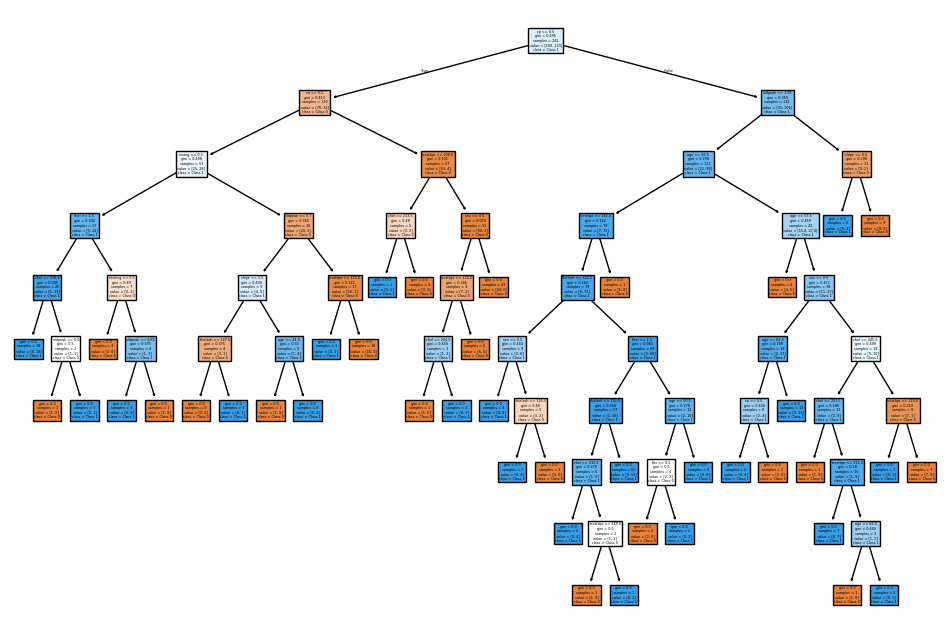

In [13]:
plt.figure(figsize=(12, 8))  
tree.plot_tree(data_cl, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

In [14]:
importances = data_cl.feature_importances_


feat_importance_data = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance_data)


     Feature  Importance
2         cp    0.225263
11        ca    0.118478
9    oldpeak    0.113268
0        age    0.106735
4       chol    0.093679
3   trestbps    0.081394
8      exang    0.075421
7    thalach    0.046207
1        sex    0.041015
10     slope    0.038537
12      thal    0.027214
5        fbs    0.016693
6    restecg    0.016097


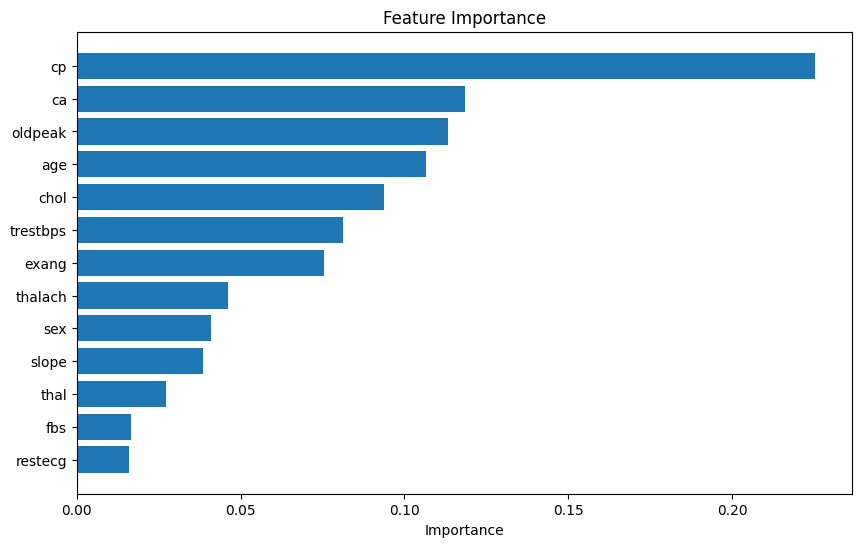

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_data['Feature'], feat_importance_data['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
data_rc = RandomForestClassifier(n_estimators=100,random_state=42)
data_rc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
r_pre= data_rc.predict(X_test)
classification_rep = classification_report(y_test, r_pre)

In [19]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# --------------------------------------------

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.model_selection import train_test_split
X = data.drop("target", axis = 1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
log_reg_model = LogisticRegression(max_iter= 1000)
svc_model = SVC()
rfc_model = RandomForestClassifier(n_estimators = 100, criterion= 'gini', random_state = 40)
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier(n_neighbors=10)

models = [log_reg_model, svc_model, rfc_model, xgb_model,knn_model]

In [34]:
def training(models, X_train, y_train, X_test, y_test):
    model_accuracy = {}
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        model_accuracy[type(model).__name__] = acc
    
    return model_accuracy


In [35]:
df = training(models,X_train, y_train, X_test, y_test)
df

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'SVC': 0.7049180327868853,
 'RandomForestClassifier': 0.8524590163934426,
 'XGBClassifier': 0.819672131147541,
 'KNeighborsClassifier': 0.7049180327868853}

In [36]:
scores = [0.8852459016393442, 0.7049180327868853, 0.8524590163934426, 0.819672131147541,0.7049180327868853]
models = ['LogisticRegression','SVC','RandomForestClassifier','XGBClassifier','KNeighborsClassifier']
new_df = pd.DataFrame({'score': scores}, index=models)

print(new_df)

                           score
LogisticRegression      0.885246
SVC                     0.704918
RandomForestClassifier  0.852459
XGBClassifier           0.819672
KNeighborsClassifier    0.704918


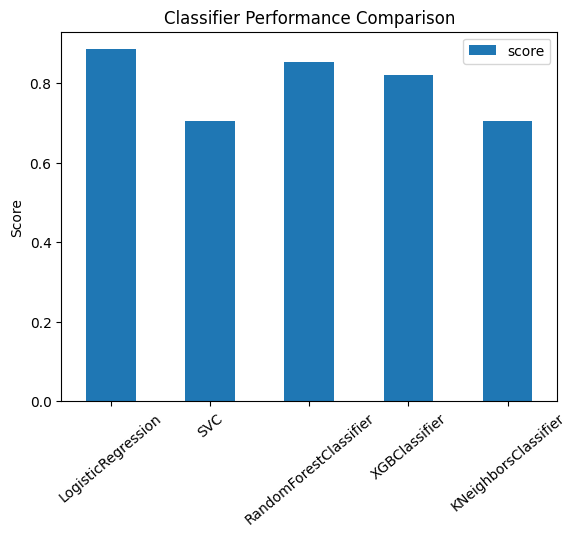

In [37]:
new_df.plot(kind='bar')
plt.ylabel("Score")
plt.title("Classifier Performance Comparison")
plt.xticks(rotation=40)
plt.show()


In [28]:
import numpy as np

In [29]:
from sklearn.neighbors import KNeighborsClassifier

neighbours = np.arange(1,21)
train_scores = []
test_scores = []

for i in neighbours:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))



In [30]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Best Test score: 0.75


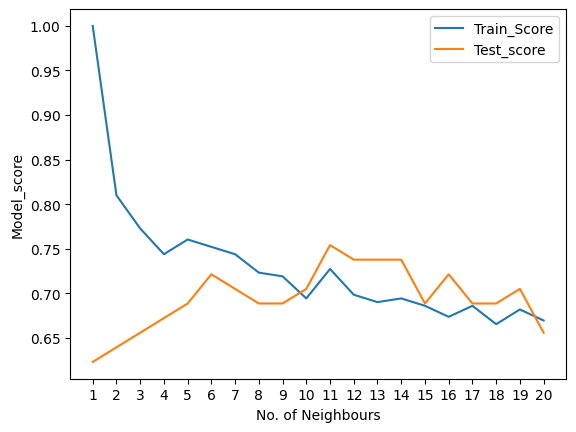

In [31]:
plt.plot(neighbours, train_scores, label = "Train_Score")
plt.plot(neighbours, test_scores, label = "Test_score")
plt.xticks(np.arange(1,21))
plt.xlabel("No. of Neighbours")
plt.ylabel("Model_score")
plt.legend()
print(f"Best Test score: {max(test_scores):.2f}")

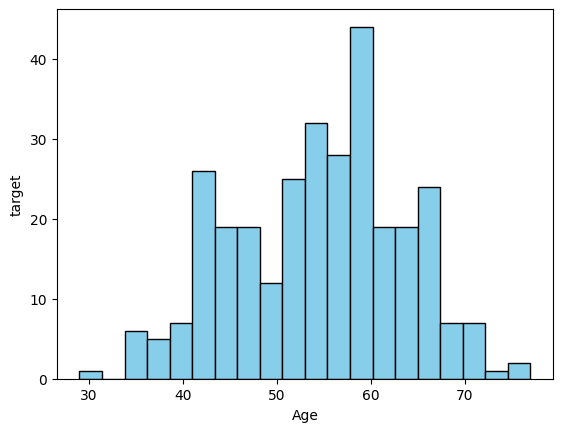

In [32]:
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('target')
plt.show()